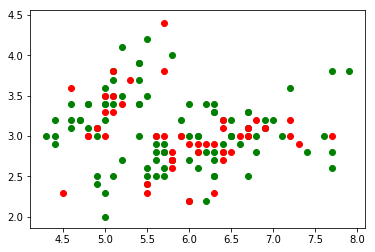

start train


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data #objects
y = iris.target #which class
# 3 types of irises

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y)

plt.scatter(x_train[:, 0], x_train[:, 1], color = 'g')
plt.scatter(x_test[:, 0], x_test[:, 1], color = 'r')
plt.show()

def K(r):
    return 1/(r+1)

def ro(u, x):
    return scipy.spatial.distance.euclidean(u, x)

#def alpha()
def potential_func_algorith(u, gammas, h, train_x, train_y):
    catsCount = len(np.unique(train_y))
    
    lenX = len(train_x)
    sizeTest = len(u)
    answer = []
    for k in range(sizeTest):
        a = np.zeros(catsCount)
        for i in range(catsCount):
            for j in range(lenX):
                a[i] += (train_y[j] == i)*gammas[i]*K(ro(u[k], train_x[j])/h)
        answer.append(np.argmax(a))
    return answer
                

def get_gammas(x_train, y_train, h):
    size = len(y_train)
    gammas = [0, 0, 0]
    stop = 0
    while stop < 2*size:
        i = np.random.randint(size)
        alpha = potential_func_algorith(x_train, gammas, h, x_train, y_train)
        if alpha[i] != y_train[i]:
            gammas[y_train[i]] += 1
        stop += 1
    return gammas  

print("start train")        
gammas = get_gammas(x_train, y_train, 2)


#hi = num of x?

In [7]:
print("start predict")
answer = potential_func_algorith(x_test, gammas, 2, x_train, y_train)
true = 0
sz = len(answer)
for i in range(sz):
    if y_test[i] == answer[i]:
        true += 1
        
print('Right answers: ', true)
print("False answers: ", sz-true)

start predict
Right answers:  41
False answers:  4
